In [1]:
from visual_behavior.data_access import loading, utilities
import visual_behavior.utilities as vbu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## load the full stimulus table, then view details for a single experiment

In [2]:
et = loading.get_filtered_ophys_experiment_table(release_data_only=True)
et['cre_line'].unique()

array(['Sst-IRES-Cre', 'Vip-IRES-Cre', 'Slc17a7-IRES2-Cre'], dtype=object)

In [3]:
oeid= et.query('cre_line == "Slc17a7-IRES2-Cre" and session_type == "OPHYS_4_images_B"').sample(random_state=0).index[0]

In [4]:
et.loc[oeid]

equipment_name                                                                MESO.1
full_genotype                      Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...
mouse_id                                                                      484627
reporter_line                                                     Ai93(TITL-GCaMP6f)
driver_line                                          [Slc17a7-IRES2-Cre, Camk2a-tTA]
sex                                                                                M
age_in_days                                                                      113
cre_line                                                           Slc17a7-IRES2-Cre
indicator                                                                    GCaMP6f
session_number                                                                     4
prior_exposures_to_session_type                                                    0
prior_exposures_to_image_set                                     

## load a dataset object

In [5]:
dataset = loading.get_ophys_dataset(oeid)

## load the stimulus table

In [6]:
stimulus_table = dataset.stimulus_presentations
stimulus_table.head(10)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,
0,0.25021,18001.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,False,17986,308.57085,308.82106
1,0.25020,18046.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,False,18031,309.32147,309.57167
2,0.25019,18091.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,False,18076,310.07208,310.32227
3,0.25013,18136.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,False,18121,310.82274,311.07287
4,0.25021,18181.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4,False,False,18166,311.57326,311.82347
5,0.25021,18226.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,5,False,False,18211,312.32387,312.57408
6,0.25020,18271.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,6,False,False,18256,313.07450,313.32470
7,0.25020,18316.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,7,False,False,18301,313.82515,314.07535
8,NaN,NaN,8,omitted,omitted,0,False,True,18345,314.55904,NaN


## load a tidy dataframe of cell activity

In [7]:
tidy_df = utilities.build_tidy_cell_df(dataset)
tidy_df

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events
0,8.54249,1080730001,1086512421,0.276424,0.0,0.0
1,8.63569,1080730001,1086512421,0.477695,0.0,0.0
2,8.72890,1080730001,1086512421,0.229618,0.0,0.0
3,8.82210,1080730001,1086512421,0.008415,0.0,0.0
4,8.91531,1080730001,1086512421,-0.028617,0.0,0.0
...,...,...,...,...,...,...
4350505,4514.95184,1080731685,1086542408,0.112574,0.0,0.0
4350506,4515.04508,1080731685,1086542408,0.116418,0.0,0.0
4350507,4515.13831,1080731685,1086542408,0.100769,0.0,0.0
4350508,4515.23155,1080731685,1086542408,0.148043,0.0,0.0


## make an event triggered average for a single cell relative to stimulus omissions

In [8]:
etr = vbu.event_triggered_response(
    tidy_df.query('cell_specimen_id == 1086512421'),
    parameter = 'dff',
    event_times = stimulus_table.query('omitted')['start_time'],
    t_before=3,
    t_after=3,
)
etr

,time,dff,event_number,event_time
0,-3.000000,0.078459,0,314.55904
1,-2.983333,0.078459,0,314.55904
2,-2.966667,0.078459,0,314.55904
3,-2.950000,0.078459,0,314.55904
4,-2.933333,0.074763,0,314.55904
...,...,...,...,...
65875,2.916667,0.041221,182,3908.3439
65876,2.933333,0.054843,182,3908.3439
65877,2.950000,0.068464,182,3908.3439
65878,2.966667,0.082086,182,3908.3439


## plot the event triggered average using seaborn lineplot

<AxesSubplot:xlabel='time', ylabel='dff'>

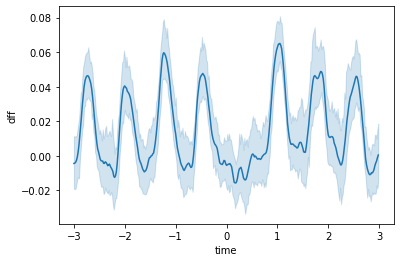

In [9]:
sns.lineplot(
    data=etr,
    x='time',
    y='dff',
    n_boot=100
)

## make a simple function so that the above can be done in a single line

In [10]:
def make_event_triggered_plot(df, x, y, event_query, ax, t_before=3, t_after=3):
    etr = vbu.event_triggered_response(
        df,
        parameter = y,
        event_times = stimulus_table.query(event_query)['start_time'],
        t_before=t_before,
        t_after=t_before,
    )
    sns.lineplot(
        data=etr,
        x=x,
        y=y,
        n_boot=100,
        ax=ax
    )

## repeat for events instead of dff

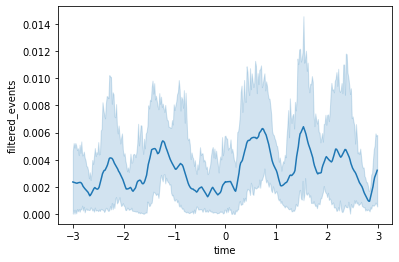

In [11]:
fig, ax = plt.subplots()
make_event_triggered_plot(
    df = tidy_df.query('cell_specimen_id == 1086512421'), 
    x = 'time', 
    y = 'filtered_events', 
    event_query = 'omitted', 
    ax=ax
)

## iterate through the first 10 individual cells and plot the omission triggered dff response

In [12]:
csids = tidy_df['cell_specimen_id'].unique()
csids

array([1086512421, 1086512180, 1086519523, 1086531274, 1086520978,
       1086541701, 1086542234, 1086527247, 1086527059, 1086528066,
       1086513171, 1086551231, 1086551328, 1086524022, 1086511343,
       1086550091, 1086514955, 1086530481, 1086518618, 1086531005,
       1086551629, 1086530720, 1086530205, 1086512733, 1086519109,
       1086538596, 1086538367, 1086541438, 1086545592, 1086518873,
       1086529064, 1086521178, 1086513935, 1086513389, 1086510641,
       1086525885, 1086516031, 1086512917, 1086510432, 1086541992,
       1086523645, 1086526878, 1086530045, 1086517198, 1086525333,
       1086562416, 1086531431, 1086534633, 1086510069, 1086524619,
       1086534872, 1086524868, 1086544475, 1086527684, 1086527491,
       1086514461, 1086562733, 1086535267, 1086516567, 1086520100,
       1086519261, 1086547441, 1086536456, 1086553084, 1086542951,
       1086522252, 1086532140, 1086553184, 1086526678, 1086553501,
       1086533064, 1086521945, 1086532704, 1086532395, 1086540

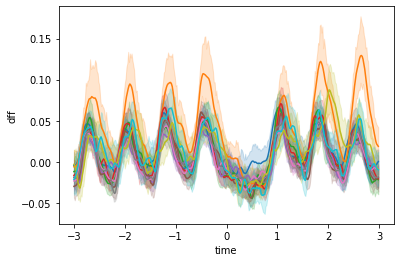

In [13]:
fig, ax = plt.subplots()

for csid in csids[:10]:
    make_event_triggered_plot(
        df = tidy_df.query('cell_specimen_id == @csid'), 
        x = 'time', 
        y = 'dff', 
        event_query = 'omitted', 
        ax=ax
    )

## a quick decoding demo
Can we train a decoder to identify the image identity from dff or event activity?

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

#### First we're going to build a new tidy dataframe with one row for each stimulus presentation, cell identity and timestep relative to the stimulus
Note that for every distinct stimulus we are only going to gather responses from the stimulus onset time to 0.75 seconds after the stimulus onset.  

Also note that we are only looking at the first presentation of every stimulus after the change. That dramatically cuts down on the amount of data we have access to and speeds model fitting. 

In [15]:
# get all unique images, excluding the omissions
image_identities = [im for im in np.sort(stimulus_table['image_name'].unique()) if im != 'omitted']

# set up an empty list that will contain all event triggered responses
full_etr = []

# iterate over every image and cell
for image_index, image_identity in enumerate(image_identities):
    for csid in tidy_df['cell_specimen_id'].unique():
        
        # a print statement to track progress
        print('on image_name {}, cell {}'.format(image_identity, csid), end = '\r')
        
        # get the event triggered response for all presentations of this image for this cell
        etr = vbu.event_triggered_response(
            tidy_df.query('cell_specimen_id == @csid'),
            parameter = 'dff',
            event_times = stimulus_table.query('image_name == @image_identity and is_change')['start_time'],
            t_before = 0,
            t_after = 0.75
        )
        
        # append to the list
        full_etr.append(etr)

        # add a column with the cell_id and the image_identity
        full_etr[-1]['cell_specimen_id'] = csid
        full_etr[-1]['image_index'] = image_index
        full_etr[-1]['image_name'] = image_identity
                
# concatenate all dataframes into a single dataframe
full_etr = pd.concat(full_etr)

## now we have one big dataframe with responses for all cells to the presentation of every image


## Next, we can train a simple Support Vector Machine decoder to try to identify the image based on the vectors of df/f responses that we just built

In [16]:
def run_svm(cell_list, etr):

    image_identities = [im for im in np.sort(etr['image_name'].unique()) if im != 'omitted']

    # set up empty lists of X and y values
    X = []
    y = []
    # iterate over every image
    for image_index, image_identity in enumerate(image_identities):
        # get the event triggered response for this image for all desired cells
        etr_this_image = etr.query('cell_specimen_id in @cell_list and image_name == @image_identity')
        
        # now iterate over every presentation of this image
        for event_number in etr_this_image['event_number'].unique():
            # append the vector of responses to X
            X.append(etr_this_image.query('event_number == @event_number')['dff'].values)
            # and append the image index to y
            y.append(image_index)

    # Now split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # instantiate our model
    model = svm.SVC(probability=True)
    
    # fit our model
    model.fit(X_train, y_train)

    # get predictions on the test data
    y_pred = model.predict(X_test)

    # save out the confusion matrix and accuracy
    result = {}
    result['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    result['accuracy'] = accuracy_score(y_test, y_pred)

    return model, result

### Now run the model for each cell individually. This tells us how accurate any given cell is at decoding _all_ images.

In [17]:
cells = {}
for csid in tidy_df['cell_specimen_id'].unique():
    cells[csid] = {}
    print('on cell {}'.format(csid), end = '\r')
    
    cell_list = [csid]
    
    model, res = run_svm(cell_list, full_etr)
    
    cells[csid]['confusion_matrix'] = res['confusion_matrix']
    cells[csid]['accuracy'] = float(res['accuracy'])

### Organize results into a dataframe

In [18]:
results_df = pd.DataFrame(cells).T
results_df.index.name = 'cell_specimen_id'
results_df

,confusion_matrix,accuracy
cell_specimen_id,,
1086512421,"[[0, 5, 0, 2, 1, 2, 1, 2], [0, 4, 2, 2, 1, 1, ...",0.170213
1086512180,"[[0, 2, 0, 1, 1, 3, 1, 5], [1, 10, 0, 1, 0, 0,...",0.244681
1086519523,"[[4, 1, 1, 0, 3, 0, 1, 3], [2, 0, 1, 0, 4, 0, ...",0.212766
1086531274,"[[3, 0, 0, 1, 1, 0, 2, 6], [2, 1, 1, 1, 1, 0, ...",0.180851
1086520978,"[[1, 2, 1, 2, 0, 0, 5, 2], [0, 4, 0, 1, 4, 0, ...",0.180851
...,...,...
1086548837,"[[1, 1, 0, 1, 2, 1, 5, 2], [1, 5, 1, 1, 0, 0, ...",0.212766
1086524291,"[[2, 4, 1, 1, 1, 0, 2, 2], [0, 4, 0, 0, 3, 0, ...",0.234043
1086521834,"[[1, 1, 2, 3, 0, 3, 2, 1], [1, 1, 3, 1, 1, 0, ...",0.117021


### and look at our accuracy results.
Average performance of just under 17% - barely above chance, which would be 12.5% (1/8)
The best cell gets 32% correct.

In [19]:
results_df['accuracy'].astype(float).describe()

count    90.000000
mean      0.167730
std       0.049567
min       0.085106
25%       0.127660
50%       0.164894
75%       0.199468
max       0.329787
Name: accuracy, dtype: float64

### Now run the decoder again, but give it access to the full population.

In [20]:
cell_list = list(full_etr['cell_specimen_id'].unique())
    
model, res = run_svm(cell_list, full_etr)

### The full population does much better. Accuracy goes to 72%

In [21]:
res['accuracy']

0.723404255319149

### And here's the confusion matrix. Diagonal components are correct classifications, off-diagionals are incorrect

In [22]:
res['confusion_matrix']

array([[ 8,  0,  0,  0,  2,  0,  0,  3],
       [ 0, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  1,  1,  0,  0,  1],
       [ 1,  0,  2,  8,  1,  0,  0,  1],
       [ 3,  0,  0,  0,  4,  0,  0,  3],
       [ 3,  0,  0,  0,  2,  7,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  9,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 11]])

### what if we use _every_ image presentation, instead of just the first (change image)? We'll have dramatically more data, so things will be slower
We'll first rebuilt the event_triggered_response dataframe to include every image presentation. This takes the better part of 10 minutes to run.

In [23]:
# get all unique images, excluding the omissions
image_identities = [im for im in np.sort(stimulus_table['image_name'].unique()) if im != 'omitted']

# set up an empty list that will contain all event triggered responses
full_etr = []

# iterate over every image and cell
for image_index, image_identity in enumerate(image_identities):
    for csid in tidy_df['cell_specimen_id'].unique():
        
        # a print statement to track progress
        print('on image_name {}, cell {}'.format(image_identity, csid), end = '\r')
        
        # get the event triggered response for all presentations of this image for this cell
        etr = vbu.event_triggered_response(
            tidy_df.query('cell_specimen_id == @csid'),
            parameter = 'dff',
            event_times = stimulus_table.query('image_name == @image_identity')['start_time'],
            t_before = 0,
            t_after = 0.75
        )
        
        # append to the list
        full_etr.append(etr)

        # add a column with the cell_id and the image_identity
        full_etr[-1]['cell_specimen_id'] = csid
        full_etr[-1]['image_index'] = image_index
        full_etr[-1]['image_name'] = image_identity
                
# concatenate all dataframes into a single dataframe
full_etr = pd.concat(full_etr)

### Now we can see how are previous best cell, which had ~33% accuracy, does on all images, rather than just the changes.

In [26]:
previous_best_cell = results_df[results_df['accuracy'] == results_df['accuracy'].max()].index[0]
previous_best_cell

1086545592

Accuracy has actually fallen to ~25% for this cell

In [27]:
model, res = run_svm([previous_best_cell], full_etr)
res['accuracy']

0.2544262295081967

The confusion matrix shows that we're actually able to do very well at decoding image 7 with this cell (lower/right value), but many of the other images cannot be decoded using this cell's activity alone.

In [28]:
res['confusion_matrix']

array([[ 44,  76,   1,  71,   6,   1,  17,   4],
       [ 41,  75,   0,  77,   8,   1,  18,   8],
       [ 29,  66,   0,  50,   3,   3,  16,   7],
       [ 44,  62,   3,  80,   5,   3,  17,   5],
       [ 21,  47,   1,  62,  10,   3,  12,   7],
       [ 25,  32,   3,  43,   7,   2,   8,   8],
       [ 19,  26,   2,  47,   8,   0,  35,  41],
       [ 14,  10,   0,  12,   5,   5,  27, 142]])

### And what about the full population?
Again, this is a bit slow because the volume of data is now quite large. There is a lot of data for the model to fit.

In [29]:
cell_list = list(full_etr['cell_specimen_id'].unique())
    
model, res = run_svm(cell_list, full_etr)

Accuracy goes up to 87%!

In [30]:
res['accuracy']

0.8740983606557376

And the confusion matrix shows that all individual images can be decoded with reasonable accuracy (all diagonal elements are large)

In [31]:
res['confusion_matrix']

array([[186,   0,   2,  13,   9,   7,   1,   2],
       [  6, 213,   0,   4,   1,   0,   0,   4],
       [ 12,   0, 139,  19,   2,   1,   0,   1],
       [  8,   0,   1, 200,   1,   1,   0,   8],
       [ 11,   0,   1,   3, 136,   8,   1,   3],
       [ 12,   0,   7,   3,   6,  95,   1,   4],
       [  2,   0,   3,   1,   0,   2, 168,   2],
       [  5,   0,   1,  10,   2,   1,   0, 196]])